In [336]:
import numpy as np
import IPython
import scipy.io.wavfile
import scipy.signal
import scipy
import matplotlib.pyplot as plt

In [358]:
# Fir filters with firwin()
def lowpass(f, fs):
    x = scipy.signal.firwin(100, 0.3)
    plt.figure()
    w, h = scipy.signal.freqz( x)
    plt.plot(w * fs/(2*np.pi), abs(h))
    plt.xlabel("HZ")
    return np.convolve(x, f)

def highpass(f, fs):
    x = scipy.signal.firwin(201, 0.25, pass_zero=False)
    plt.figure()
    w, h = scipy.signal.freqz( x)
    plt.plot(w * fs/(2*np.pi), abs(h))
    plt.xlabel("HZ")
    return np.convolve(x, f)
    
def bandpass(f, fs):
    x = scipy.signal.firwin(200, [0.1, 0.13], pass_zero=False)
    plt.figure()
    w, h = scipy.signal.freqz( x)
    plt.plot(w * fs/(2*np.pi), abs(h))
    plt.xlabel("HZ")
    return np.convolve(x, f)

def bandreject(f, fs):
    x = scipy.signal.firwin(201, [0.2, 0.4])
    plt.figure()
    w, h = scipy.signal.freqz( x)
    plt.plot(w * fs/(2*np.pi), abs(h))
    plt.xlabel("HZ")
    return np.convolve(x, f)

# My own Fir filters
def my_lowpass(f, fs):
    x =  .3*np.sinc( .3 * np.arange( -200, 200) )
    x = np.multiply(x, scipy.signal.get_window('hann', 400))
    plt.figure()
    w, h = scipy.signal.freqz( x)
    plt.plot(w * fs/(2*np.pi), abs(h))
    plt.xlabel("HZ")
    return np.convolve(x, f)

def my_highpass(f, fs):
    x = - .25*np.sinc( .25 * np.arange( -200, 200) )
    x[int(len(x)/2)] += 1
    x = np.multiply(x, scipy.signal.get_window('hann', 400))
    plt.figure()
    w, h = scipy.signal.freqz( x)
    plt.plot(w * fs/(2*np.pi), abs(h))
    plt.xlabel("HZ")
    return np.convolve(x, f)

def my_bandpass(f, fs):
    n = np.arange( -2000, 2000)
    x = 2 * np.cos(np.pi* n *0.1) *0.015* np.sinc( 0.015 * n )
    x = np.multiply(x, scipy.signal.get_window('hann', 4000))
    plt.figure()
    w, h = scipy.signal.freqz( x)
    plt.plot(w * fs/(2*np.pi), abs(h))
    plt.xlabel("HZ")
    return np.convolve(x, f)

def my_bandreject(f, fs):
    n = np.arange( -200, 200)
    x = - 2 * np.cos(np.pi* n *0.3) *0.1* np.sinc( 0.1 * n )
    x[int(len(x)/2)] += 1
    x = np.multiply(x, scipy.signal.get_window('hann', 400))
    plt.figure()
    w, h = scipy.signal.freqz( x)
    plt.plot(w * fs/(2*np.pi), abs(h))
    plt.xlabel("HZ")
    return np.convolve(x, f)

# iir filters with butter()
def iir_lowpass(f, fs):
    nyq = 0.5 * fs
    b, a = scipy.signal.butter(20, 5000 / nyq, btype='lowpass', output = 'ba')
    plt.figure()
    w, h = scipy.signal.freqz( b, a)
    plt.plot(w * fs/(2*np.pi), abs(h))
    plt.xlabel("HZ")
    return scipy.signal.lfilter(b, a, f)

def iir_highpass(f, fs):
    nyq = 0.5 * fs
    b, a = scipy.signal.butter(20, 2000 / nyq, btype='highpass', output = 'ba')
    plt.figure()
    w, h = scipy.signal.freqz( b, a)
    plt.plot(w * fs/(2*np.pi), abs(h))
    plt.xlabel("HZ")
    return scipy.signal.lfilter(b, a, f)

def iir_bandpass(f, fs):
    nyq = 0.5 * fs
    low = 800 / nyq
    high = 1000 / nyq
    b, a = scipy.signal.butter(5, [low, high], btype='band')
    plt.figure()
    w, h = scipy.signal.freqz( b, a)
    plt.plot(w * fs/(2*np.pi), abs(h))
    plt.xlabel("HZ")
    return scipy.signal.lfilter(b, a, f)

def iir_bandreject(f, fs):
    nyq = 0.5 * fs
    low = 1500 / nyq
    high = 3400 / nyq
    b, a = scipy.signal.butter(10, [low, high], btype='bandstop')
    plt.figure()
    w, h = scipy.signal.freqz( b, a)
    plt.plot(w * fs/(2*np.pi), abs(h))
    plt.xlabel("HZ")
    return scipy.signal.lfilter(b, a, f)

In [359]:
# The original files of Part 1

frate1, file1 = scipy.io.wavfile.read("./case1.wav")
frate2, file2 = scipy.io.wavfile.read("./case2.wav")
frate3, file3 = scipy.io.wavfile.read("./case3.wav")
frate4, file4 = scipy.io.wavfile.read("./case4.wav")

IPython.display.display( IPython.display.Audio( file1, rate=frate1))
IPython.display.display( IPython.display.Audio( file2, rate=frate2))
IPython.display.display( IPython.display.Audio( file3, rate=frate3))
IPython.display.display( IPython.display.Audio( file4, rate=frate4))

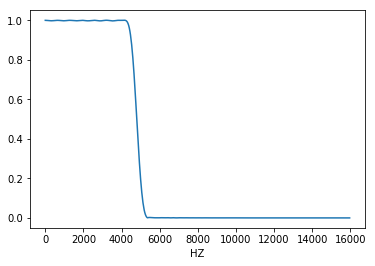

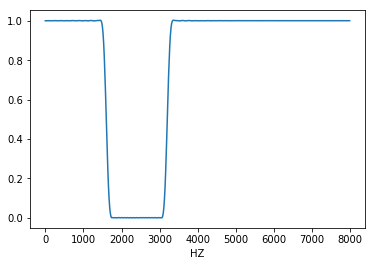

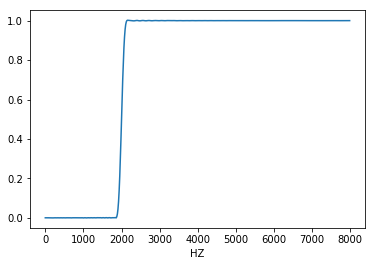

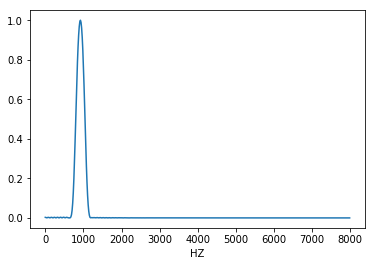

In [360]:
'''
denoise case 1 with firwin() low pass filter
denoise case 2 with firwin() band reject filter
denoise case 3 with firwin() high pass filter
denoise case 4 with firwin() band pass filter
'''
denoised1 = lowpass(file1, frate1)
denoised2 = bandreject(file2, frate2)
denoised3 = highpass(file3, frate3)
denoised4 = bandpass(file4, frate4)

IPython.display.display( IPython.display.Audio( denoised1, rate=frate1))
IPython.display.display( IPython.display.Audio( denoised2, rate=frate2))
IPython.display.display( IPython.display.Audio( denoised3, rate=frate3))
IPython.display.display( IPython.display.Audio( denoised4, rate=frate4))

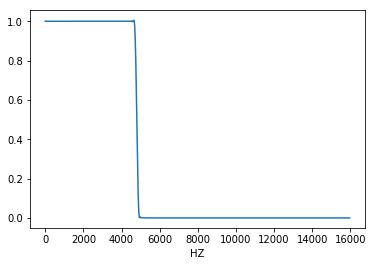

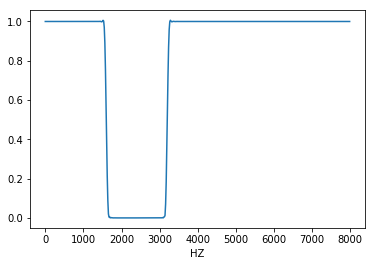

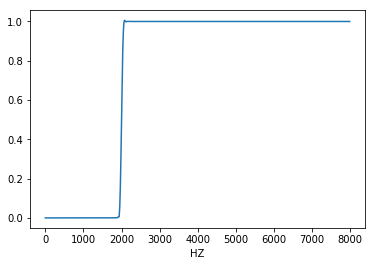

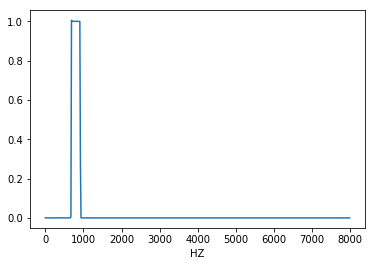

In [361]:
# denoise the four cases again with my own design of filters
my_denoised1 = my_lowpass(file1, frate1)
my_denoised2 = my_bandreject(file2, frate2)
my_denoised3 = my_highpass(file3, frate3)
my_denoised4 = my_bandpass(file4, frate4)

IPython.display.display( IPython.display.Audio( my_denoised1, rate=frate1))
IPython.display.display( IPython.display.Audio( my_denoised2, rate=frate2))
IPython.display.display( IPython.display.Audio( my_denoised3, rate=frate3))
IPython.display.display( IPython.display.Audio( my_denoised4, rate=frate4))

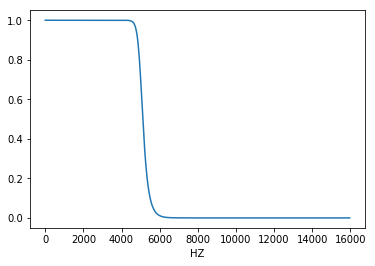

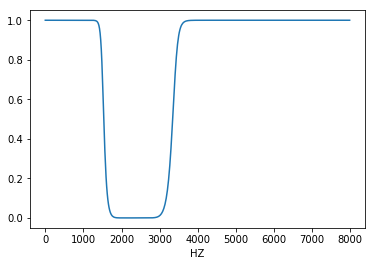

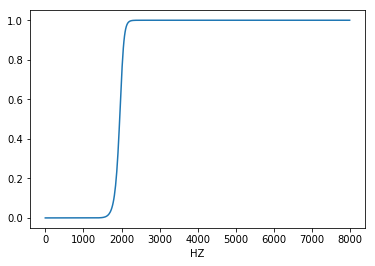

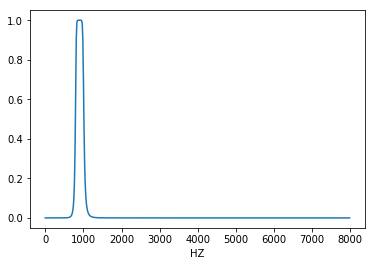

In [362]:
# denoise the cases with iir butter filters
iir_denoised1 = iir_lowpass(file1, frate1)
iir_denoised2 = iir_bandreject(file2, frate2)
iir_denoised3 = iir_highpass(file3, frate3)
iir_denoised4 = iir_bandpass(file4, frate4)

IPython.display.display( IPython.display.Audio( iir_denoised1, rate=frate1))
IPython.display.display( IPython.display.Audio( iir_denoised2, rate=frate2))
IPython.display.display( IPython.display.Audio( iir_denoised3, rate=frate3))
IPython.display.display( IPython.display.Audio( iir_denoised4, rate=frate4))

In [392]:
# Part 2 (with extra credit)
# I added a parameter fs (sampling rate) for convenience
def equalizer(sound, gain, freqs, fs):
    nyq = fs/2
    freqs = np.hstack((np.array([0]),np.array(freqs)/nyq,np.array([1])))
    gain = np.hstack((np.array([1]),gain,np.array([0])))
    
    x = scipy.signal.firwin2( 150, freqs, gain)
    plt.figure()
    w, h = scipy.signal.freqz( x)
    plt.plot(w * fs/(2*np.pi), abs(h))
    plt.xlabel("HZ")
    return np.convolve(x, sound)

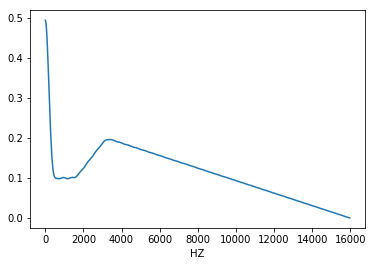

In [398]:
# Input the parameters you want into the 'freqs' and 'gain' lists
# An arbitary test with inputs given by the non-EC part
freqs = [100, 200, 400, 800, 1600, 3200]
gain = [0.5,0.1,0.1,0.1,0.1,0.2]
eq = equalizer(file1, gain, freqs, frate1)
IPython.display.display( IPython.display.Audio( eq, rate=frate1))

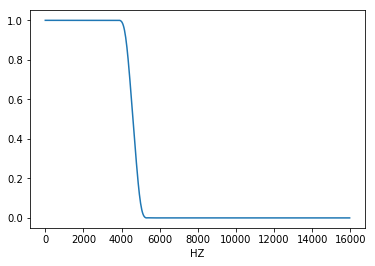

In [403]:
# Extra Credits
# Use EQ to denoise case1
freqs = [4200, 5000]
gain = [1, 0]
case1_eq = equalizer(file1, gain, freqs, frate1)
IPython.display.display( IPython.display.Audio( case1_eq, rate=frate1))

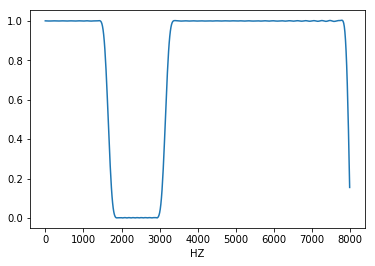

In [404]:
# Use EQ to denoise case2
freqs = [1600, 1700, 3100, 3200, frate2/2]
gain = [1, 0, 0, 1, 1]
case2_eq = equalizer(file2, gain, freqs, frate2)
IPython.display.display( IPython.display.Audio( case2_eq, rate=frate2))

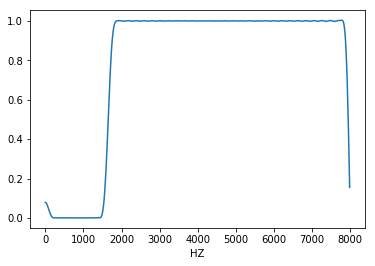

In [405]:
# Use EQ to denoise case3
freqs = [0, 1600, 1700, frate3/2]
gain = [0, 0, 1, 1]
case3_eq = equalizer(file3, gain, freqs, frate3)
IPython.display.display( IPython.display.Audio( case3_eq, rate=frate3))

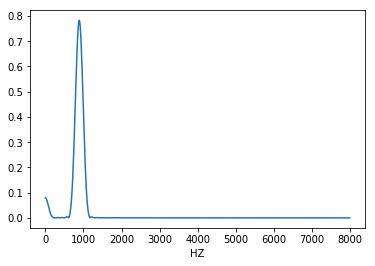

In [406]:
# Use EQ to denoise case4
freqs = [0, 800, 801, 999, 1000]
gain = [0, 0, 1, 1, 0]
case4_eq = equalizer(file4, gain, freqs, frate4)
IPython.display.display( IPython.display.Audio( case4_eq, rate=frate4))